<a href="https://colab.research.google.com/github/ananya15082002/Colab/blob/main/SpotifyMinor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values:
 track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


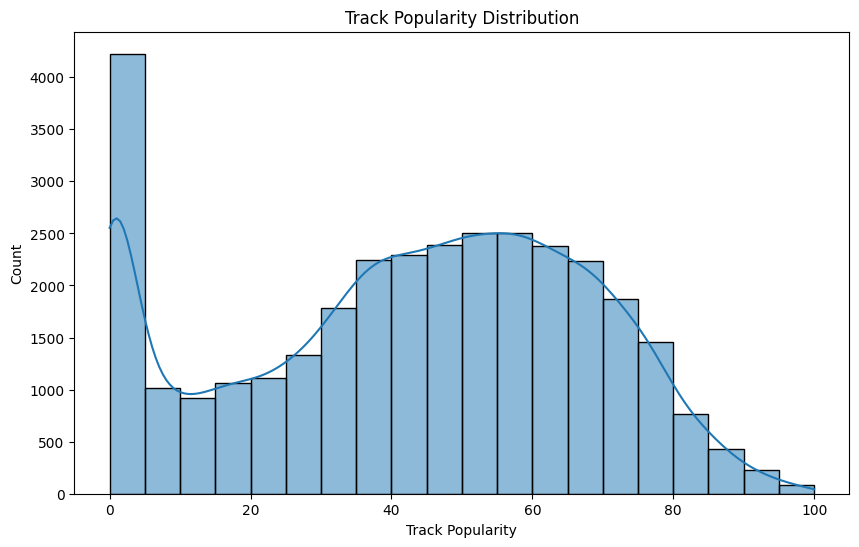

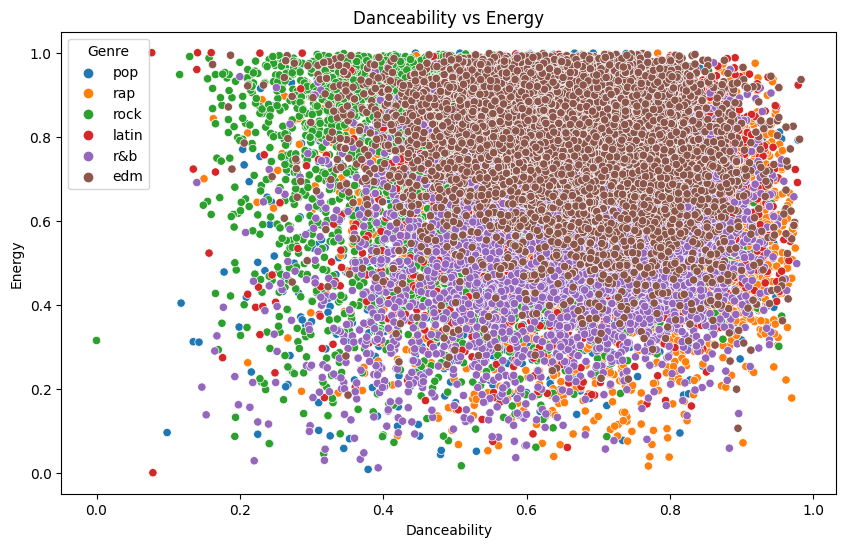

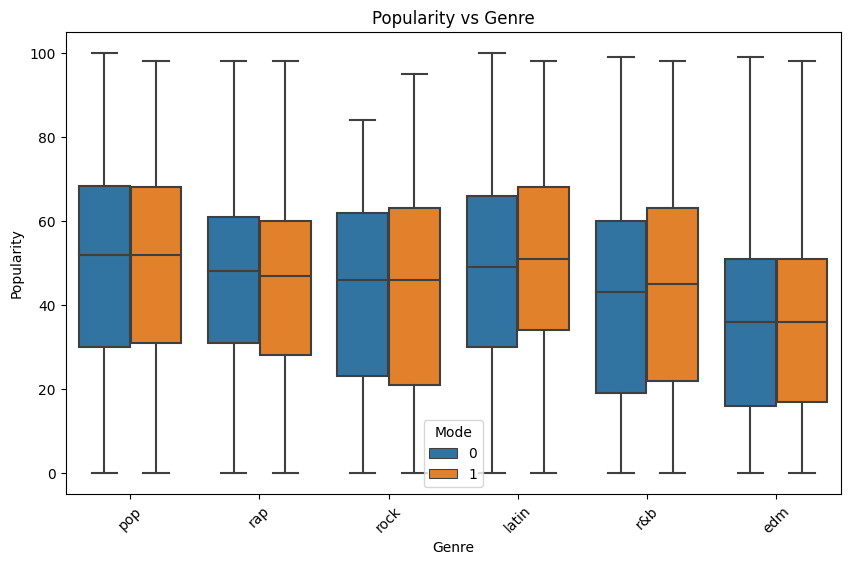

<ipython-input-18-8c333d23eeb5>:43: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


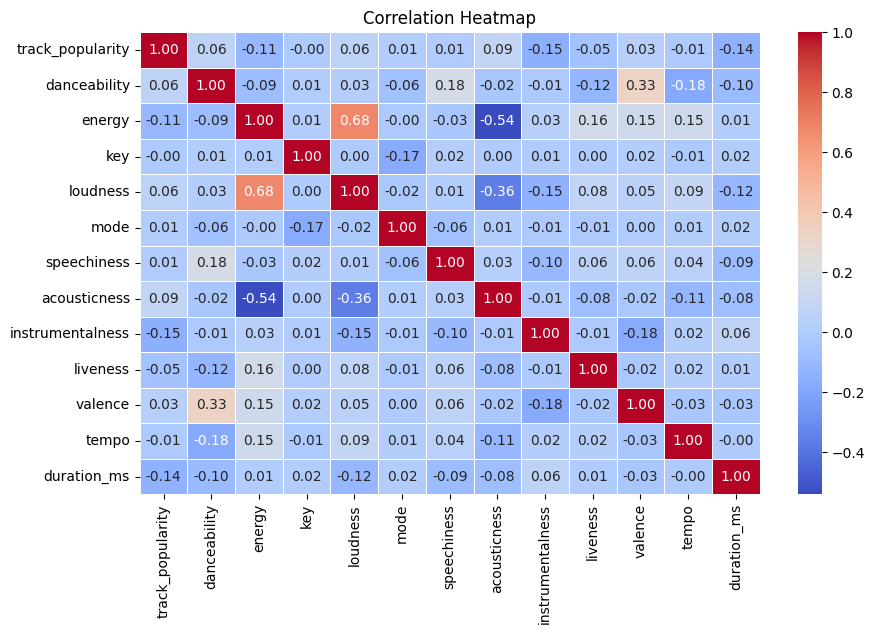

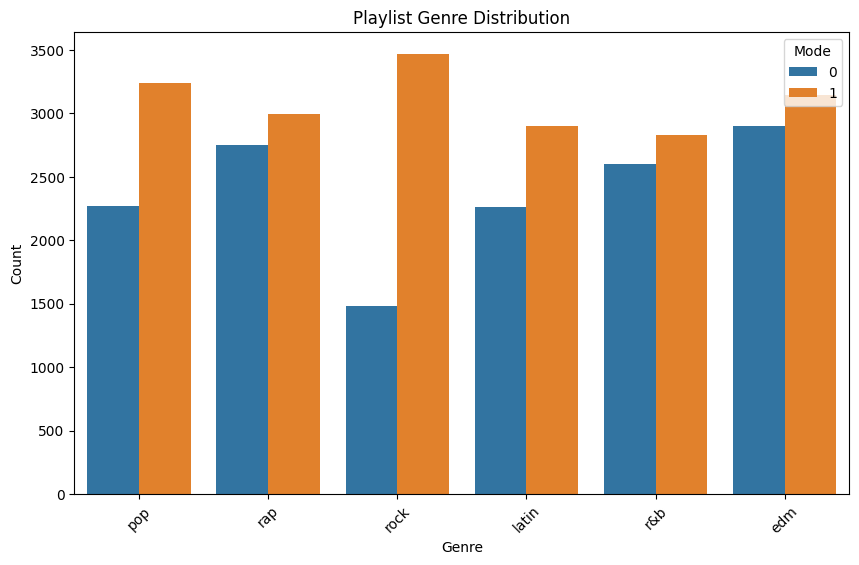

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("spotify dataset.csv")

# Data Pre-processing
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Data Visualization

# 1. Track Popularity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=20, kde=True)
plt.title("Track Popularity Distribution")
plt.xlabel("Track Popularity")
plt.ylabel("Count")
plt.show()

# 2. Danceability vs Energy Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability', y='energy', hue='playlist_genre')
plt.title("Danceability vs Energy")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.legend(title='Genre')
plt.show()

# 3. Popularity vs Valence (Happiness) Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='playlist_genre', y='track_popularity', hue='mode')
plt.title("Popularity vs Genre")
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.legend(title='Mode')
plt.xticks(rotation=45)
plt.show()

# 4. Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 5. Playlist Genre Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='playlist_genre', hue='mode')
plt.title("Playlist Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.legend(title='Mode')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

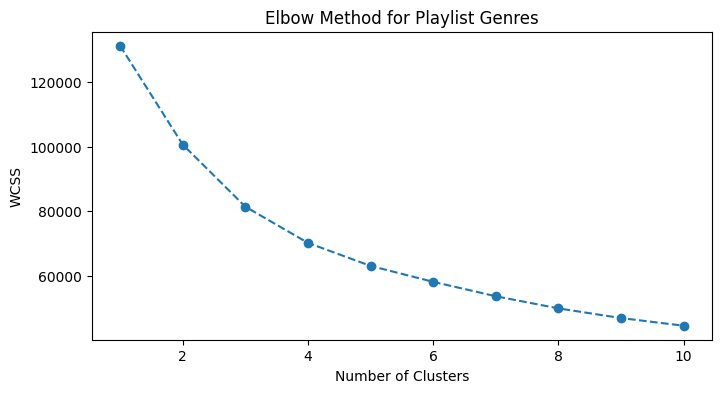

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


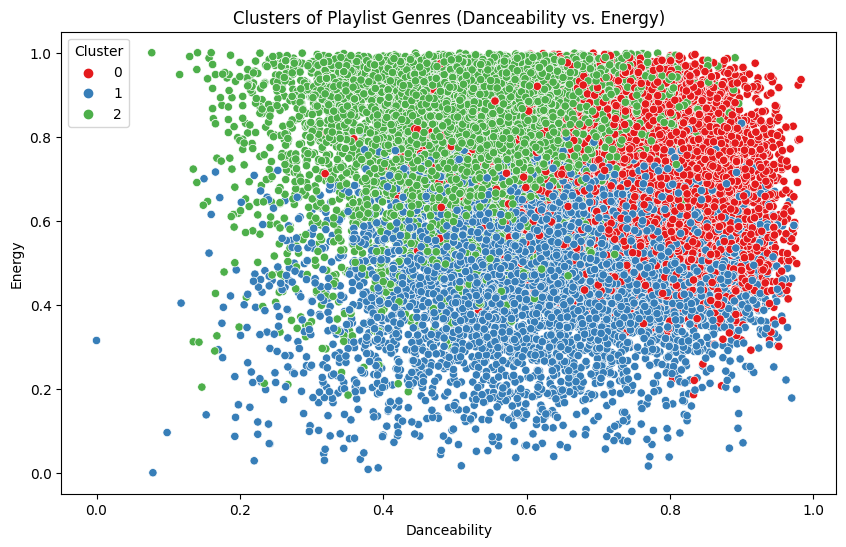

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

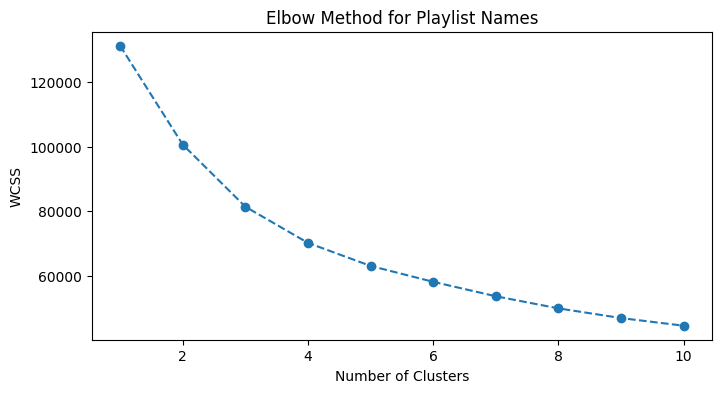

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


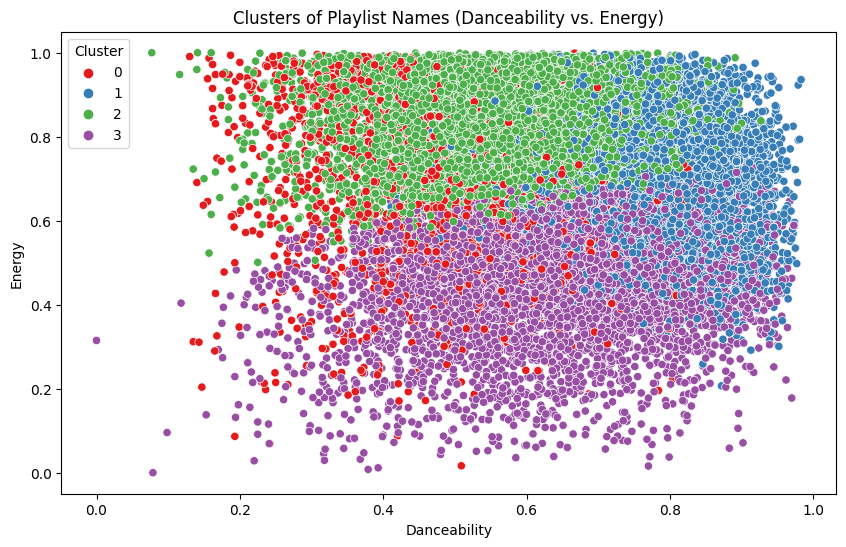

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Clustering by Playlist Genres
# Extract relevant features for clustering
genre_features = df[['danceability', 'energy', 'valence', 'tempo']]

# Standardize the features
scaler = StandardScaler()
scaled_genre_features = scaler.fit_transform(genre_features)

# Determine the number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_genre_features)
    wcss.append(kmeans.inertia_)


# Plot the Elbow method results to find the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Playlist Genres')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (e.g., 3)
n_clusters_genre = 3

# Perform K-Means clustering
kmeans_genre = KMeans(n_clusters=n_clusters_genre, init='k-means++', random_state=42)
genre_clusters = kmeans_genre.fit_predict(scaled_genre_features)

# Add the cluster labels to the DataFrame
df['genre_cluster'] = genre_clusters
# Plot the clusters based on Playlist Genres
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability', y='energy', hue='genre_cluster', palette='Set1')
plt.title("Clusters of Playlist Genres (Danceability vs. Energy)")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.legend(title='Cluster')
plt.show()

# Clustering by Playlist Names
# Extract relevant features for clustering
name_features = df[['danceability', 'energy', 'valence', 'tempo']]

# Standardize the features
scaler = StandardScaler()
scaled_name_features = scaler.fit_transform(name_features)
# Determine the number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_name_features)
    wcss.append(kmeans.inertia_)

            # Plot the Elbow method results to find the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Playlist Names')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

            # Based on the Elbow method, choose the optimal number of clusters (e.g., 4)
n_clusters_name = 4

            # Perform K-Means clustering
kmeans_name = KMeans(n_clusters=n_clusters_name, init='k-means++', random_state=42)
name_clusters = kmeans_name.fit_predict(scaled_name_features)

            # Add the cluster labels to the DataFrame
df['name_cluster'] = name_clusters
# Plot the clusters based on Playlist Names
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability', y='energy', hue='name_cluster', palette='Set1')
plt.title("Clusters of Playlist Names (Danceability vs. Energy)")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.legend(title='Cluster')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Select relevant features for recommendation (e.g., danceability, energy, valence, and tempo)
features_for_recommendation = df[['danceability', 'energy', 'valence', 'tempo']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_recommendation)

# Build the KNN model
k = 5  # Number of nearest neighbors to consider (you can adjust this)
knn_model = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn_model.fit(scaled_features)

# Function to recommend tracks based on a given track index
def recommend_tracks(track_index):
    query_track = scaled_features[track_index].reshape(1, -1)
    distances, indices = knn_model.kneighbors(query_track)

    recommended_tracks = df.iloc[indices[0]][['track_name', 'track_artist', 'playlist_genre', 'playlist_name']]

    return recommended_tracks

# Example: Recommend tracks similar to a specific track (e.g., track at index 0)
track_index = 0
recommended_tracks = recommend_tracks(track_index)
print(f"Recommended Tracks for '{df['track_name'][track_index]}' by {df['track_artist'][track_index]}:")
print(recommended_tracks)


Recommended Tracks for 'I Don't Care (with Justin Bieber) - Loud Luxury Remix' by Ed Sheeran:
                                              track_name   track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...     Ed Sheeran   
29684  I Don't Care (with Justin Bieber) - Loud Luxur...     Ed Sheeran   
17159                                          Teardrops  Tainted Youth   
29713                          Rise - TV Noise Ibiza Mix     Jonas Blue   
3144        SLOW DANCING IN THE DARK - Loud Luxury Remix           Joji   

      playlist_genre                                      playlist_name  
0                pop                                          Pop Remix  
29684            edm                                    Pop EDM Remixes  
17159          latin  Tropical House Remixes 🍍 Tropical Remixes & Tr...  
29713            edm                                    Pop EDM Remixes  
3144             pop                                         Electropop  
